# Prediction of Comprehensive Scores in School Based On Linear Regression
---


## Case Introduction

The university ranking is a highly important and challenging issue, as well as controversial. The comprehensive strength of a university involves various aspects such as scientific research, faculty, and students. Currently, there are hundreds of evaluation institutions worldwide that assess universities' comprehensive scores for ranking, and these institutions' scores often differ. Among these ranking institutions, the Center for World University Rankings (CWUR) is highly influential. It is known for evaluating educational quality, alumni employment, research output, and citations, rather than relying on surveys and data submitted by universities.

In this task, we will use the rankings provided by CWUR for various aspects of renowned universities worldwide (faculty, scientific research, etc.). On one hand, we will observe the characteristics of different universities through data visualization. On the other hand, we aim to build a machine learning model (linear regression) to predict the comprehensive score of a university.


1. Import Package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

2. Import Datas

In [2]:
path = './cwurData.csv'
df = pd.read_csv(path,sep=',')
df.iloc[0]

world_rank                               1
institution             Harvard University
region                                 USA
national_rank                            1
quality_of_education                     7
alumni_employment                        9
quality_of_faculty                       1
publications                             1
influence                                1
citations                                1
broad_impact                           NaN
patents                                  5
score                                100.0
year                                  2012
Name: 0, dtype: object

In [3]:
len(df)
df.head()

world_rank                            institution          region   
0           1                     Harvard University             USA  \
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty   
0              1                     7                  9                   1  \
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           NaN        5  100.00  2012  
1            12          4          4           NaN        1   91.67  2012  
2             4          2          2           NaN       15   89.50  2012  
3            16         16         11           NaN       50   86.17  2012  
4            37         22         22           NaN       18   85.21  2012

3. Data Preprocessing

In [4]:
df = df.dropna()
print(len(df))
df.head().T

2000


200                  201   
world_rank                             1                    2  \
institution           Harvard University  Stanford University   
region                               USA                  USA   
national_rank                          1                    2   
quality_of_education                   1                   11   
alumni_employment                      1                    2   
quality_of_faculty                     1                    4   
publications                           1                    5   
influence                              1                    3   
citations                              1                    3   
broad_impact                         1.0                  4.0   
patents                                2                    6   
score                              100.0                99.09   
year                                2014                 2014   

                                                        202   
world_rank                                                3  \
institution           Massachusetts Institute of Technology   
region                                                  USA   
national_rank                                             3   
quality_of_education                                      3   
alumni_employment                                        11   
quality_of_faculty                                        2   
publications                                             15   
influence                                                 2   
citations                                                 2   
broad_impact                                            2.0   
patents                                                   1   
score                                                 98.69   
year                                                   2014   

                                          203                   204  
world_rank                                  4                     5  
institution           University of Cambridge  University of Oxford  
region                         United Kingdom        United Kingdom  
national_rank                               1                     2  
quality_of_education                        2                     7  
alumni_employment                          10                    12  
quality_of_faculty                          5                    10  
publications                               10                    11  
influence                                   9                    12  
citations                                  12                    11  
broad_impact                             13.0                  12.0  
patents                                    48                    16  
score                                   97.64                 97.51  
year                                     2014                  2014

In [39]:
feature_names = ['quality_of_education','alumni_employment','quality_of_faculty',
                 'publications',
                 'influence',
                 'citations',
                 'broad_impact',
                 'patents',
                 'institution',
                 'score']
X = df[feature_names[:-2]]
Y = df[feature_names[-1]]
X

quality_of_education  alumni_employment  quality_of_faculty   
200                      1                  1                   1  \
201                     11                  2                   4   
202                      3                 11                   2   
203                      2                 10                   5   
204                      7                 12                  10   
...                    ...                ...                 ...   
2195                   367                567                 218   
2196                   236                566                 218   
2197                   367                549                 218   
2198                   367                567                 218   
2199                   367                567                 218   

      publications  influence  citations  broad_impact  patents  
200              1          1          1           1.0        2  
201              5          3          3           4.0        6  
202             15          2          2           2.0        1  
203             10          9         12          13.0       48  
204             11         12         11          12.0       16  
...            ...        ...        ...           ...      ...  
2195           926        845        812         969.0      816  
2196           997        908        645         981.0      871  
2197           830        823        812         975.0      824  
2198           886        974        812         975.0      651  
2199           861        991        812         981.0      547  

[2000 rows x 8 columns]

In [40]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2,random_state=2020)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((1600, 8), (400, 8), (1600,), (400,))

4. Data Visualiztion 

In [41]:
mean_df = df[feature_names].groupby('institution').mean()
top_df = mean_df.sort_values(by='score',ascending=False).head(10)

Use `barplot` to get score rank

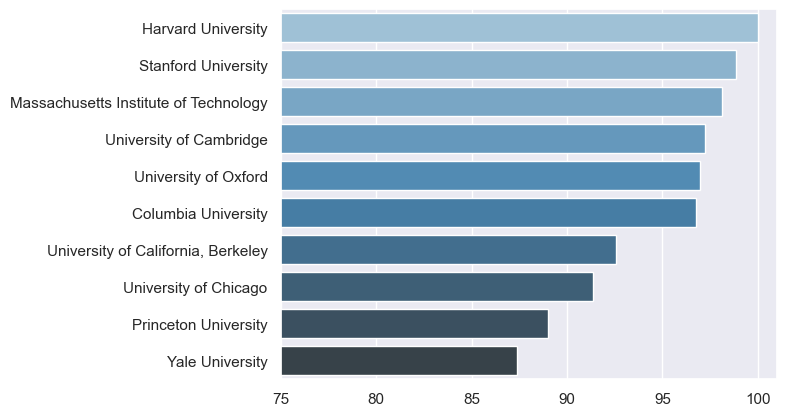

In [42]:
sns.set()
x = top_df['score'].values
y = top_df.index.values
sns.barplot(x=x,y=y,orient='h',palette='Blues_d')
plt.xlim(75,101)
plt.show()

Use `pairplot` to analyze the correlation between  two different variable

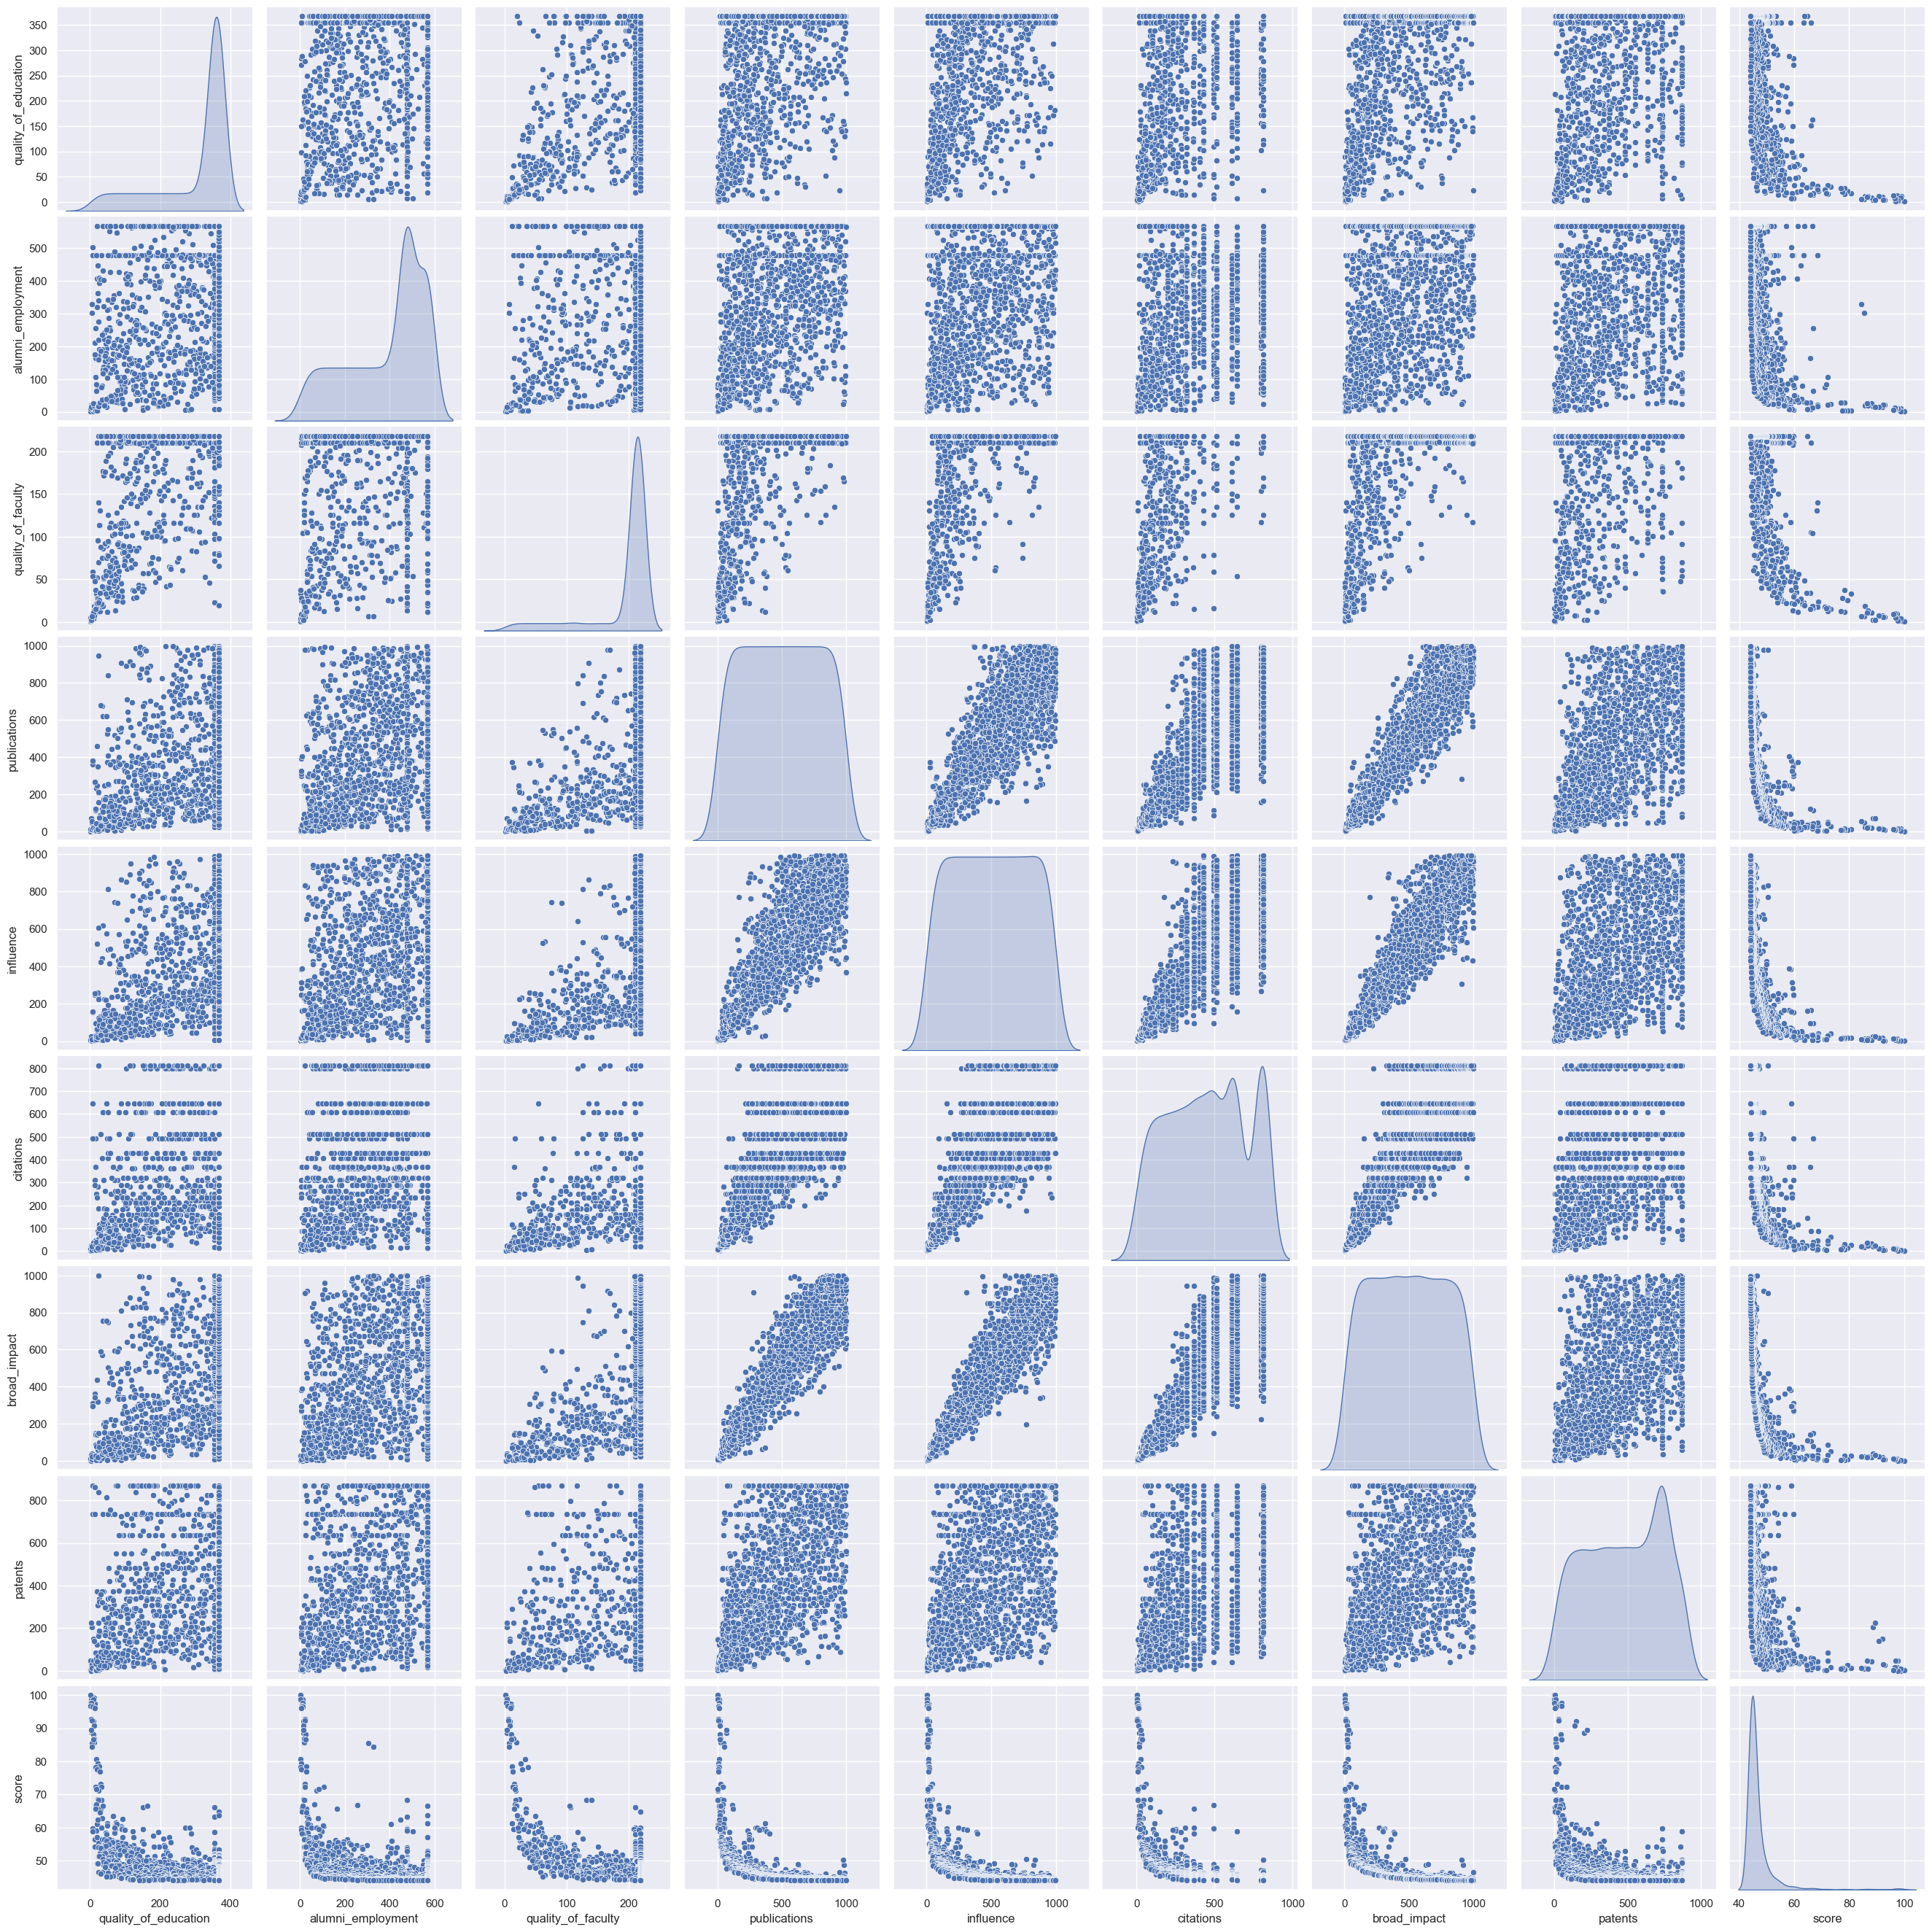

In [43]:
sns.pairplot(df[feature_names[:-2] + [feature_names[-1]]],height=3,diag_kind='kde')
plt.show()

Use `heatmap` to get the correlation matrix

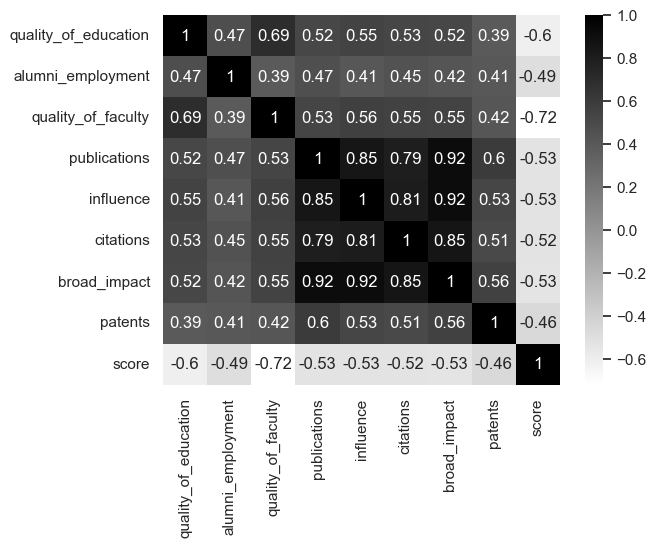

In [44]:
f = df[feature_names[:-2]+[feature_names[-1]]].corr()
sns.heatmap(f,annot=True,cmap=plt.get_cmap('binary'))
plt.show()

5. Model Training

In [45]:
lr = LinearRegression()
lr.fit(train_x,train_y)
predict_y = lr.predict(test_x)
err = predict_y - test_y
rmse = (err**2).mean()**0.5
print(f'rmse:{rmse:.4f}')

rmse:3.9990


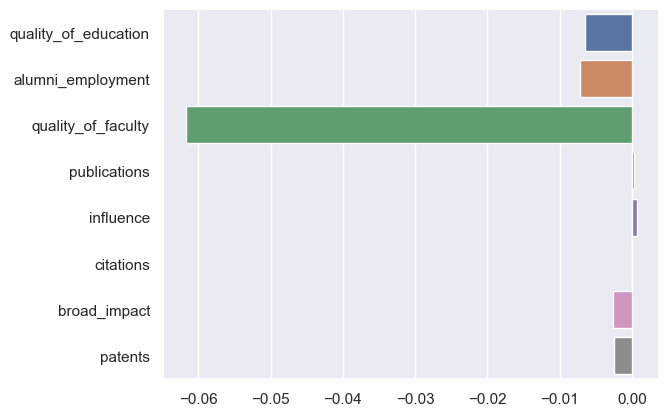

In [48]:
sns.set()
sns.barplot(x=lr.coef_,y=feature_names[:-2])
plt.show()

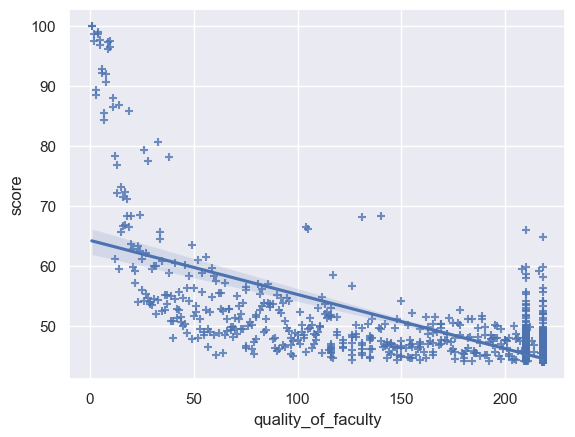

In [31]:
sns.regplot(x=df['quality_of_faculty'],y=df['score'], marker="+")
plt.show()